In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/valentina/Desktop/RRHH TF/attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
vars = ['Age','Gender', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [6]:
data = data[vars]

In [8]:
data.to_csv("att.csv")

In [9]:
vars_empleado=['Age','Gender','Education','EducationField','DistanceFromHome','NumCompaniesWorked','MaritalStatus','Over18','TotalWorkingYears']
vars_company = ['BusinessTravel','DailyRate','Department','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobRole',
                'JobSatisfaction','MonthlyIncome','MonthlyRate','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel',
                'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']
len(vars_company)

25

In [10]:
data_num = data.select_dtypes(include=['number'])
data_corr = data_num[['Age', 'DistanceFromHome',
                        'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                        'TotalWorkingYears',
                        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                        'YearsWithCurrManager']]

In [11]:
import seaborn as sns
import plotly.express as px


<Axes: >

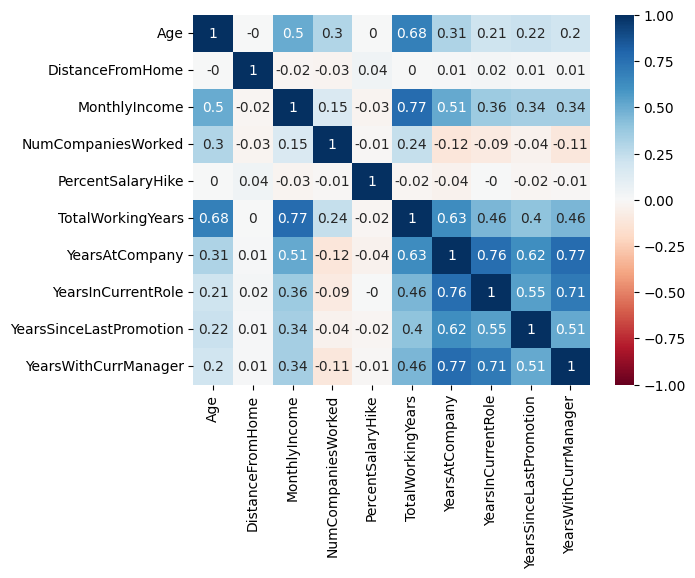

In [12]:
# Calculate the correlation matrix
correlation_matrix = round(data_corr.corr(),2)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Gender                   1470 non-null   object
 2   Attrition                1470 non-null   object
 3   BusinessTravel           1470 non-null   object
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   EmployeeCount            1470 non-null   int64 
 7   EmployeeNumber           1470 non-null   int64 
 8   EnvironmentSatisfaction  1470 non-null   int64 
 9   JobInvolvement           1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  OverTime                 1470 non-null  

In [15]:
columns_to_dummy = ['BusinessTravel','OverTime','Attrition'] 
data_dummy = pd.get_dummies(data[columns_to_dummy])
data_dummy = data_dummy[['BusinessTravel_Travel_Frequently','OverTime_Yes','Attrition_Yes']] 

In [16]:
df_backup = data

In [17]:
data_reduced = data[['Age',
                    #'DistanceFromHome','NumCompaniesWorked'
                    'MonthlyIncome','PercentSalaryHike',
                    'TotalWorkingYears',
                    'YearsAtCompany', 'YearsInCurrentRole',
                    #'YearsSinceLastPromotion',
                    'YearsWithCurrManager']]

In [18]:
data_final = pd.concat([data_reduced, data_dummy], axis=1)

In [19]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Age                               1470 non-null   int64
 1   MonthlyIncome                     1470 non-null   int64
 2   PercentSalaryHike                 1470 non-null   int64
 3   TotalWorkingYears                 1470 non-null   int64
 4   YearsAtCompany                    1470 non-null   int64
 5   YearsInCurrentRole                1470 non-null   int64
 6   YearsWithCurrManager              1470 non-null   int64
 7   BusinessTravel_Travel_Frequently  1470 non-null   uint8
 8   OverTime_Yes                      1470 non-null   uint8
 9   Attrition_Yes                     1470 non-null   uint8
dtypes: int64(7), uint8(3)
memory usage: 84.8 KB


In [20]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Age                               1470 non-null   int64
 1   MonthlyIncome                     1470 non-null   int64
 2   PercentSalaryHike                 1470 non-null   int64
 3   TotalWorkingYears                 1470 non-null   int64
 4   YearsAtCompany                    1470 non-null   int64
 5   YearsInCurrentRole                1470 non-null   int64
 6   YearsWithCurrManager              1470 non-null   int64
 7   BusinessTravel_Travel_Frequently  1470 non-null   uint8
 8   OverTime_Yes                      1470 non-null   uint8
 9   Attrition_Yes                     1470 non-null   uint8
dtypes: int64(7), uint8(3)
memory usage: 84.8 KB


# Construcción del modelo

## Split en train y test

In [21]:
import numpy as np
from imblearn.over_sampling import SMOTE

In [22]:
# la variable a predecir es 'dias_ocupado'
y = data_final['Attrition_Yes']
X = data_final.drop('Attrition_Yes', axis=1)

# convert to numpy array
X = np.array(X)
y = np.array(y)

In [23]:
# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1176, 9) (294, 9) (1176,) (294,)


In [24]:
# Applying SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)

(1954, 9) (1954,)


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [29]:
def FunctionFindBestParamsRF(X_train, y_train, X_test, y_test):
    
    # Defino los hiperparámetros a evaluar
    n_estimators = [100,200,300]#[int(x) for x in np.linspace(start = 50, stop = 800, num = 6)]
    max_depth = [None, 5, 10]  # Maximum depth of each tree
    min_samples_split = [2, 5, 10]

    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters','accuracy','sensitivity','specificity','confusion_mat'])
    
    # Inicializo los trials
    TrialNumber=0
    for n_estimators_trial in n_estimators:
        for max_depth_trial in max_depth:
            for min_samples_split_trial in min_samples_split:
                TrialNumber+=1
                
                # Creo el RANDOM FOREST
                model = RandomForestClassifier(n_estimators=n_estimators_trial,
                                               max_depth=max_depth_trial,
                                               min_samples_split=min_samples_split_trial,
                                               class_weight={0: 1, 1: 5},
                                               random_state=42)

                # Entreno el modelo
                model.fit(X_train, y_train)

                # Hago las predicciones
                y_pred = model.predict(X_test)

                # Evalúo el modelo
                accuracy = accuracy_score(y_test, y_pred)
                #precision = precision_score(y_test, y_pred)

                confusion_mat = confusion_matrix(y_test, y_pred)
                tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
                sensitivity = tp / (tp+fn)
                specificity = tn / (tn+fp)

                # Imprimo los resultados de la iteración actual
                print(TrialNumber, 'Parameters:','n_estimators:', n_estimators_trial,'-', 'max_depth:',max_depth_trial,'min_samples_split:',min_samples_split_trial)
                
                # Agrego la información del modelo a la tabla de modelos
                SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(n_estimators_trial)+'-'+
                                                                             str(max_depth_trial)+'-'+str(min_samples_split_trial), accuracy,sensitivity,specificity,confusion_mat]],
                                                                        columns=['TrialNumber', 'Parameters','accuracy','sensitivity','specificity','confusion_mat'] ))     
    return(SearchResultsData)

### Prueba con el split de SMOTE

In [ ]:
modelosRF_smote=FunctionFindBestParamsRF(X_resampled, y_resampled, X_test, y_test) # tenes que comentar el hiperparametro de class_weight

In [28]:
modelosRF_smote

,TrialNumber,Parameters,accuracy,sensitivity,specificity,confusion_mat
0,1,100-None-2,0.812925,0.421053,0.871094,"[[223, 33], [22, 16]]"
0,2,100-None-5,0.806122,0.447368,0.859375,"[[220, 36], [21, 17]]"
0,3,100-None-10,0.816327,0.447368,0.871094,"[[223, 33], [21, 17]]"
0,4,100-5-2,0.724490,0.500000,0.757812,"[[194, 62], [19, 19]]"
0,5,100-5-5,0.717687,0.500000,0.750000,"[[192, 64], [19, 19]]"
0,6,100-5-10,0.724490,0.526316,0.753906,"[[193, 63], [18, 20]]"
0,7,100-10-2,0.799320,0.447368,0.851562,"[[218, 38], [21, 17]]"
0,8,100-10-5,0.802721,0.447368,0.855469,"[[219, 37], [21, 17]]"
0,9,100-10-10,0.802721,0.473684,0.851562,"[[218, 38], [20, 18]]"
0,10,200-None-2,0.816327,0.421053,0.875000,"[[224, 32], [22, 16]]"


### Prueba con el split normal + class_weights

In [ ]:
modelosRF_weight=FunctionFindBestParamsRF(X_train, y_train, X_test, y_test) # tenes que descomentar el hiperparametro de class_weight

In [31]:
modelosRF_weight

,TrialNumber,Parameters,accuracy,sensitivity,specificity,confusion_mat
0,1,100-None-2,0.880952,0.210526,0.980469,"[[251, 5], [30, 8]]"
0,2,100-None-5,0.884354,0.263158,0.976562,"[[250, 6], [28, 10]]"
0,3,100-None-10,0.867347,0.315789,0.949219,"[[243, 13], [26, 12]]"
0,4,100-5-2,0.819728,0.473684,0.871094,"[[223, 33], [20, 18]]"
0,5,100-5-5,0.819728,0.447368,0.875000,"[[224, 32], [21, 17]]"
0,6,100-5-10,0.819728,0.473684,0.871094,"[[223, 33], [20, 18]]"
0,7,100-10-2,0.880952,0.289474,0.968750,"[[248, 8], [27, 11]]"
0,8,100-10-5,0.880952,0.289474,0.968750,"[[248, 8], [27, 11]]"
0,9,100-10-10,0.863946,0.342105,0.941406,"[[241, 15], [25, 13]]"
0,10,200-None-2,0.891156,0.263158,0.984375,"[[252, 4], [28, 10]]"


In [32]:
ganador = RandomForestClassifier(n_estimators=200,
                                               max_depth=5,
                                               min_samples_split=2,
                                               class_weight={0: 1, 1: 5},
                                               random_state=42)

In [33]:
ganador.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=5, n_estimators=200,
                       random_state=42)

In [ ]:
# Retrieve the feature importances
feature_importances = ganador.feature_importances_

# Get the list of feature names
features = data_final.drop('Attrition_Yes', axis=1).columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names and importances accordingly
sorted_features = [features[i] for i in indices]
sorted_importances = feature_importances[indices]

# Print the feature importances in descending order
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance}")

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [38]:
def FunctionFindBestParamsL(X_train, y_train, X_test, y_test):
    
    # Defino los hiperparámetros a evaluar
    penalty = ['l2','l1']

    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters','accuracy','sensitivity','specificity','confusion_mat'])
    
    # Inicializo los trials
    TrialNumber=0
    for penalty_trial in penalty:
        TrialNumber+=1
        
        # Creo el RANDOM FOREST
        model = LogisticRegression(penalty=penalty_trial,
                                   solver = 'liblinear',
                                   class_weight = {0: 1, 1: 5},
                                   random_state=42)

        # Entreno el modelo
        model.fit(X_train, y_train)

        # Hago las predicciones
        y_pred = model.predict(X_test)

        # Evalúo el modelo
        accuracy = accuracy_score(y_test, y_pred)
        #precision = precision_score(y_test, y_pred)

        confusion_mat = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp+fn)
        specificity = tn / (tn+fp)


        # Imprimo los resultados de la iteración actual
        print(TrialNumber, 'Parameters:','penalty:', penalty_trial)
        
        # Agrego la información del modelo a la tabla de modelos
        SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(penalty_trial), accuracy, sensitivity,specificity,confusion_mat]],
                                                                columns=['TrialNumber', 'Parameters','accuracy','sensitivity','specificity','confusion_mat'] ))     
    return(SearchResultsData)

### Prueba con el split de SMOTE

In [36]:
modelosL_smote=FunctionFindBestParamsL(X_resampled, y_resampled, X_test, y_test)

1 Parameters: penalty: l2
2 Parameters: penalty: l1


/var/folders/yq/2ytqr3qs5jjgdh9_jqyq67br0000gn/T/ipykernel_84904/1949979930.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(penalty_trial), accuracy, sensitivity,specificity,confusion_mat]],
/var/folders/yq/2ytqr3qs5jjgdh9_jqyq67br0000gn/T/ipykernel_84904/1949979930.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(penalty_trial), accuracy, sensitivity,specificity,confusion_mat]],


In [37]:
modelosL_smote

,TrialNumber,Parameters,accuracy,sensitivity,specificity,confusion_mat
0,1,l2,0.636054,0.736842,0.621094,"[[159, 97], [10, 28]]"
0,2,l1,0.656463,0.684211,0.652344,"[[167, 89], [12, 26]]"


### Prueba con el split normal + class_weight

In [39]:
modelosL_weights=FunctionFindBestParamsL(X_train, y_train, X_test, y_test)

1 Parameters: penalty: l2
2 Parameters: penalty: l1


/var/folders/yq/2ytqr3qs5jjgdh9_jqyq67br0000gn/T/ipykernel_84904/2715274353.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(penalty_trial), accuracy, sensitivity,specificity,confusion_mat]],
/var/folders/yq/2ytqr3qs5jjgdh9_jqyq67br0000gn/T/ipykernel_84904/2715274353.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(penalty_trial), accuracy, sensitivity,specificity,confusion_mat]],


In [40]:
modelosL_weights

,TrialNumber,Parameters,accuracy,sensitivity,specificity,confusion_mat
0,1,l2,0.734694,0.657895,0.746094,"[[191, 65], [13, 25]]"
0,2,l1,0.727891,0.657895,0.738281,"[[189, 67], [13, 25]]"


## Resample

In [164]:
X_SMOTE,y_SMOTE=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

In [165]:
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_SMOTE, y_SMOTE,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train_S.shape, X_test_S.shape, y_train_S.shape, y_test_S.shape)

(1972, 13) (494, 13) (1972,) (494,)


In [166]:
modelosL=FunctionFindBestParamsL(X_train_S, y_train_S, X_test, y_test)

1 Parameters: penalty: l2
2 Parameters: penalty: l1


/var/folders/yq/2ytqr3qs5jjgdh9_jqyq67br0000gn/T/ipykernel_41581/4088066734.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/yq/2ytqr3qs5jjgdh9_jqyq67br0000gn/T/ipykernel_41581/4088066734.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [167]:
modelosL

,TrialNumber,Parameters,accuracy,precision,recall,f1,auc_roc,confusion_mat
0,1,l2,0.680272,0.235849,0.657895,0.347222,0.670744,"[[175, 81], [13, 25]]"
0,2,l1,0.693878,0.245098,0.657895,0.357143,0.678557,"[[179, 77], [13, 25]]"


In [278]:
ganadorL = LogisticRegression(penalty='l2',
                                   solver = 'liblinear',
                                   class_weight = {0: 1, 1: 5},
                                   random_state=42)

In [279]:
ganadorL.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 5}, random_state=42,
                   solver='liblinear')

In [280]:
ganadorL

LogisticRegression(class_weight={0: 1, 1: 5}, random_state=42,
                   solver='liblinear')

In [281]:
# Retrieve the feature coefficients
coefficients = ganadorL.coef_[0]

# Get the list of feature names
features = data_final.drop('Attrition_Yes', axis=1).columns

# Create a dictionary to store feature importance pairs
feature_importance_dict = dict(zip(features, abs(coefficients)))

# Sort feature importances in descending order
sorted_importances = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Print the feature importance values
for feature, importance in sorted_importances.items():
    print(f"{feature}: {importance}")

TotalWorkingYears: 0.14890855468924907
BusinessTravel_Travel_Frequently: 0.1295557178997066
OverTime_Yes: 0.10380317390374558
YearsWithCurrManager: 0.08849328044039685
MonthlyIncome: 0.033680740015413164
Age: 0.032833758176861016
YearsInCurrentRole: 0.02864818842262659
YearsAtCompany: 0.0014635943333205868
PercentSalaryHike: 9.47632644600795e-05


In [284]:
ganadorL.coef_[0]

array([-3.28337582e-02,  3.36807400e-02, -9.47632645e-05,  1.48908555e-01,
        1.46359433e-03, -2.86481884e-02,  8.84932804e-02, -1.29555718e-01,
        1.03803174e-01, -9.09097455e-02, -1.67754753e-01,  7.30047592e-01,
        1.28625655e+00])